In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_238f2d46a4684a5691fd6bd3c73053a1 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_238f2d46a4684a5691fd6bd3c73053a1 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_238f2d46a4684a5691fd6bd3c73053a1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0TxNOSWfvUBPpveDxlG9T-xWWahuq02DyAXjviMUDerC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_238f2d46a4684a5691fd6bd3c73053a1)

body = client_238f2d46a4684a5691fd6bd3c73053a1.get_object(Bucket='diabetesprediction-donotdelete-pr-bjooiwmz3xebff',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data = df_data_1.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.BloodPressure.unique()

array([ 72.,  66.,  64.,  40.,  74.,  50.,  nan,  70.,  96.,  92.,  80.,
        60.,  84.,  30.,  88.,  90.,  94.,  76.,  82.,  75.,  58.,  78.,
        68., 110.,  56.,  62.,  85.,  86.,  48.,  44.,  65., 108.,  55.,
       122.,  54.,  52.,  98., 104.,  95.,  46., 102., 100.,  61.,  24.,
        38., 106., 114.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f0f4c0390>,
      dtype=object)

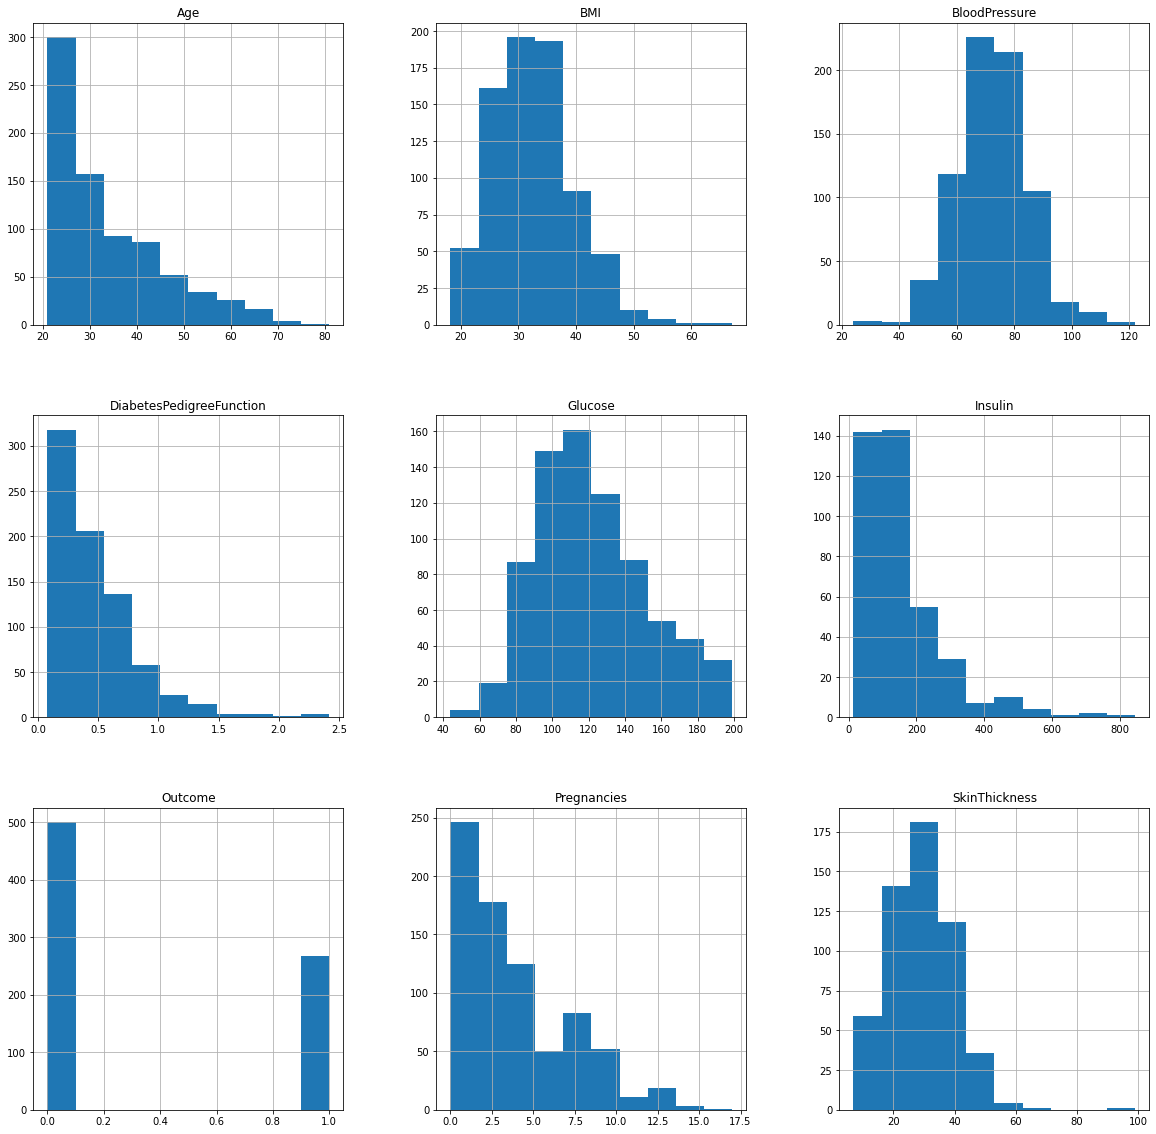

In [11]:
data.hist(figsize = (20,20))

In [12]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [13]:
data[['Glucose']] = data[['Glucose']].replace(np.NaN,120)

In [14]:
data[['Glucose']].isnull().sum()

Glucose    0
dtype: int64

In [15]:
data[['BloodPressure']] = data[['BloodPressure']].replace(np.NaN,71)
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace = True)
data['Insulin'].fillna(data['Insulin'].mean(),inplace = True)
data[['BMI']] = data[['BMI']].replace(np.NaN,33)

In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
data.to_csv('diabetes_cleaned.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f0e007790>,
      dtype=object)

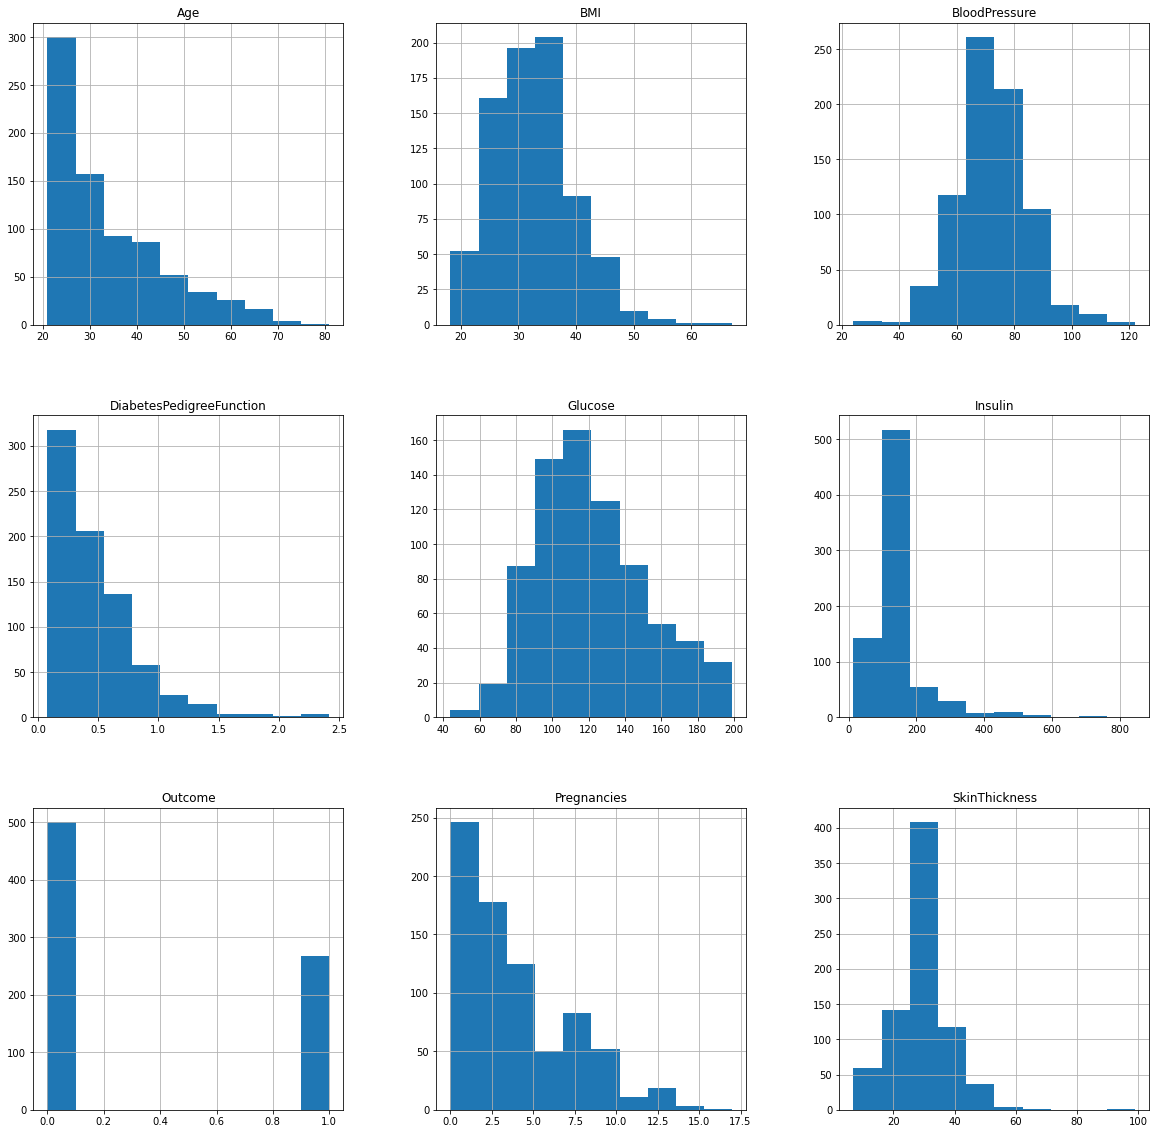

In [17]:
data.hist(figsize = (20,20))

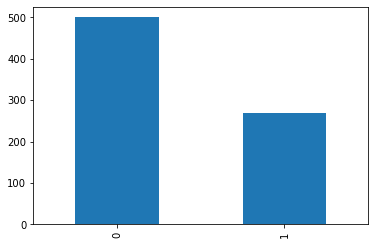

In [18]:
data.Outcome.value_counts().plot(kind='bar')

In [19]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128022,0.208802,0.082989,0.056027,0.021586,-0.033523,0.544341,0.221898
Glucose,0.128022,1.000000,0.219119,0.192971,0.420266,0.230259,0.137158,0.266673,0.492884
BloodPressure,0.208802,0.219119,1.000000,0.192851,0.072496,0.281528,-0.001428,0.325638,0.164823
SkinThickness,0.082989,0.192971,0.192851,1.000000,0.158139,0.542230,0.100966,0.127872,0.215299
Insulin,0.056027,0.420266,0.072496,0.158139,1.000000,0.166498,0.098634,0.136734,0.214411
BMI,0.021586,0.230259,0.281528,0.542230,0.166498,1.000000,0.153261,0.025250,0.311514
DiabetesPedigreeFunction,-0.033523,0.137158,-0.001428,0.100966,0.098634,0.153261,1.000000,0.033561,0.173844
Age,0.544341,0.266673,0.325638,0.127872,0.136734,0.025250,0.033561,1.000000,0.238356
Outcome,0.221898,0.492884,0.164823,0.215299,0.214411,0.311514,0.173844,0.238356,1.000000


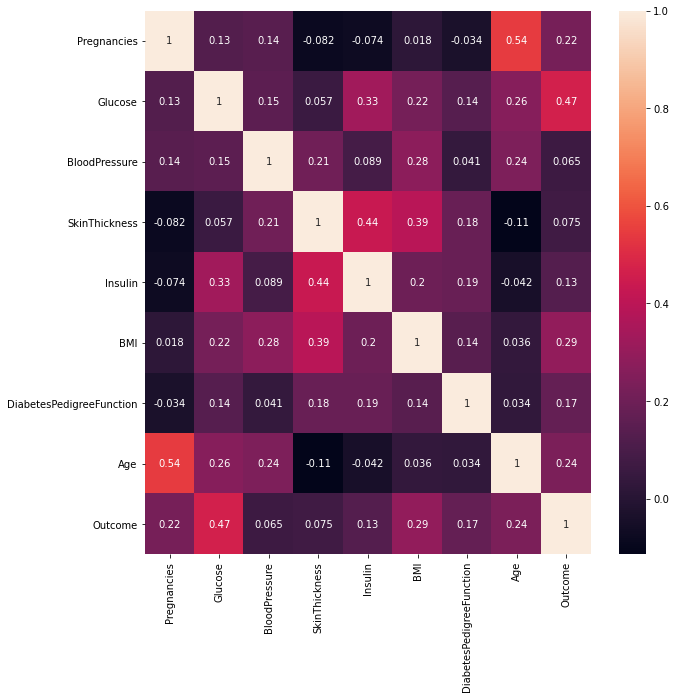

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df_data_1.corr(),annot=True)

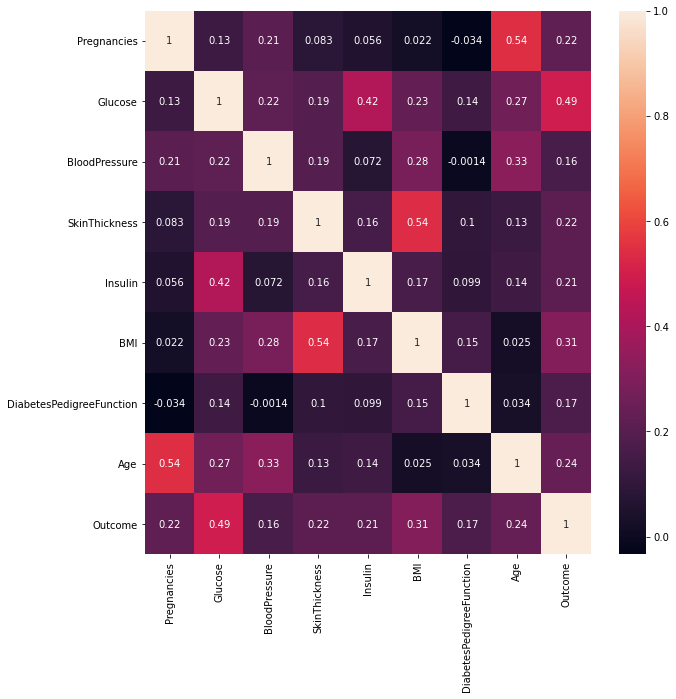

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data.Outcome

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

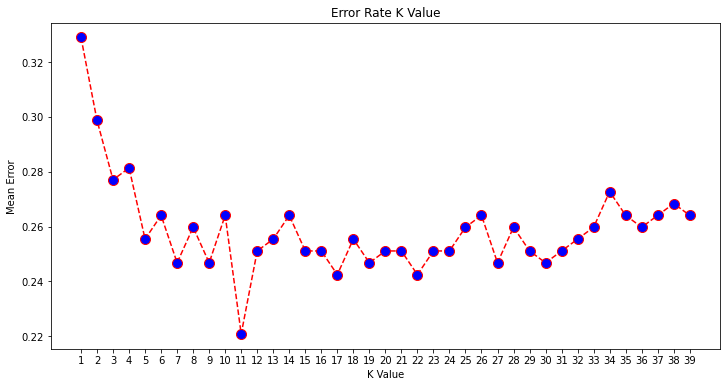

In [35]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.xticks(range(1,40))
plt.show()

In [36]:
test_scores = []
train_scores = []

for i in range(1,40):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

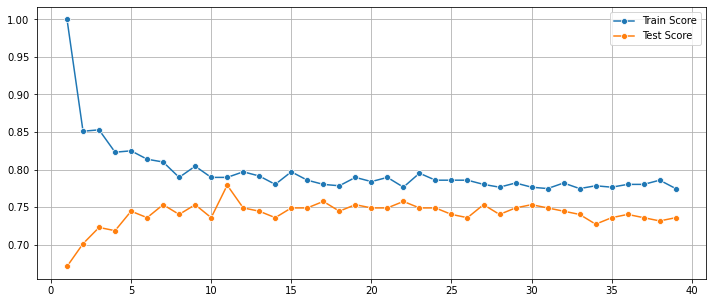

In [37]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,40),train_scores,marker='o',label='Train Score')
p = sns.lineplot(range(1,40),test_scores,marker='o',label='Test Score')
plt.grid()

In [41]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7792207792207793

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       152
           1       0.64      0.53      0.58        79

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7734997029114675
Best Parameters: {'n_neighbors': 27}
